In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#Ignore this comment

# Classification Project

In this project you will apply what you have learned about classification and PyTorch to complete a project from Kaggle. The challenge is to achieve a high accuracy score while trying to predict which passengers survived the Titanic ship crash. After building your model, you will upload your predictions to Kaggle and submit the score that you get.

## The Titanic Dataset

[Kaggle](https://www.kaggle.com) has a [dataset](https://www.kaggle.com/c/titanic/data) containing the passenger list on the Titanic. The data contains passenger features such as age, gender, ticket class, as well as whether or not they survived.

Your job is to create a binary classifier using PyTorch to determine if a passenger survived or not. The `Survived` column lets you know if the person survived. Then, upload your predictions to Kaggle and submit your accuracy score at the end of this Notebook, along with a brief conclusion.


To get the dataset, you'll need to accept the competition's rules by clicking the "I understand and accept" button on the [competition rules page](https://www.kaggle.com/c/titanic/rules). Then upload your `kaggle.json` file and run the code below.

In [2]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! ls

chmod: kaggle.json: No such file or directory
  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 19.5MB/s]
classification.ipynb titanic.zip


**Note: If you see a "403 - Forbidden" error above, you still need to click "I understand and accept" on the [competition rules page](https://www.kaggle.com/c/titanic/rules).**

Three files are downloaded:

1. `train.csv`: training data (contains features and targets)
1. `test.csv`: feature data used to make predictions to send to Kaggle
1. `gender_submission.csv`: an example competition submission file

## Step 1: Exploratory Data Analysis

Perform exploratory data analysis and data preprocessing. Use as many text and code blocks as you need to explore the data. Note any findings. Repair any data issues you find.

**Student Solution**

In [5]:
# Grabbing csv file from downloaded zip file and removing zip file

import zipfile
import os

with zipfile.ZipFile('titanic.zip','r') as z:
  z.extractall('./')

os.listdir()

! rm titanic.zip

In [54]:
import pandas as pd

train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

> Its worth noting that the age column seems to have less values than the others

In [56]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> Age Embark and Cabin have null values

No missing values otherwise

In [57]:
#checking whether there are zeroes or null values in the columns

print(f"The Passenger ID column is not missing values: {train_df['PassengerId'].all()}")
print(f"The Passenger ID column has NaN values: {train_df['PassengerId'].isna().unique()}")
print(" ")

print(f"The Survived column is not missing values: {train_df['Survived'].isna().unique()[0] == False}, {train_df['Survived'].all()}")
print(f"The Survived column has NaN values: {train_df['Survived'].isna().unique()}")
print(" ")

print(f"The Passenger Class column is not missing values: {train_df['Pclass'].all()}")
print(f"The Passenger Class column has NaN values: {train_df['Pclass'].isna().unique()}")
print(" ")

print(f"The Name column is not missing values: {train_df['Name'].all()}")
print(f"The Name column has NaN values: {train_df['Name'].isna().unique()}")
print(" ")

print(f"The Sex column is not missing values: {train_df['Sex'].all()}")
print(f"The Sex column has NaN values: {train_df['Sex'].isna().unique()}")
print(" ")

print(f"The Age column is not missing values: {train_df['Age'].all()}")
print(f"The Age column has NaN values: {train_df['Age'].isna().unique()}")
print(" ")

print(f"The Number of Siblings column is not missing values: {train_df['SibSp'].isna().unique()[0] == False}, {train_df['SibSp'].all()}")
print(f"The Number of Siblings column has NaN values: {train_df['SibSp'].isna().unique()}")
print(" ")

print(f"The Number of Parents column is not missing values: {train_df['Parch'].isna().unique()[0] == False}, {train_df['Parch'].all()}")
print(f"The Number of Parents column has NaN values: {train_df['Parch'].isna().unique()}")
print(" ")

print(f"The Ticket column is not missing values: {train_df['Ticket'].all()}")
print(f"The Ticket column has NaN values: {train_df['Ticket'].isna().unique()}")
print(" ")

print(f"The Fare column is not missing values: {train_df['Fare'].isna().unique()[0] == False}, {train_df['Fare'].all()}")
print(f"The Fare column has NaN values: {train_df['Fare'].isna().unique()}")
print(" ")

print(f"The Cabin column is not missing values: {train_df['Cabin'].all()}")
print(f"The Cabin column has NaN values: {train_df['Cabin'].isna().unique()}")
print(" ")

print(f"The Embarked column is not missing values: {train_df['Embarked'].all()}")
print(f"The Embarked column has NaN values: {train_df['Embarked'].isna().unique()}")

The Passenger ID column is not missing values: True
The Passenger ID column has NaN values: [False]
 
The Survived column is not missing values: True, False
The Survived column has NaN values: [False]
 
The Passenger Class column is not missing values: True
The Passenger Class column has NaN values: [False]
 
The Name column is not missing values: True
The Name column has NaN values: [False]
 
The Sex column is not missing values: True
The Sex column has NaN values: [False]
 
The Age column is not missing values: True
The Age column has NaN values: [False  True]
 
The Number of Siblings column is not missing values: True, False
The Number of Siblings column has NaN values: [False]
 
The Number of Parents column is not missing values: True, False
The Number of Parents column has NaN values: [False]
 
The Ticket column is not missing values: True
The Ticket column has NaN values: [False]
 
The Fare column is not missing values: True, False
The Fare column has NaN values: [False]
 
The Ca

In [58]:
#replace NaN values ith 'Unknown' for categorical data
train_df['Cabin'] = train_df['Cabin'].fillna(-1)
train_df['Embarked'] = train_df['Embarked'].fillna(-1)

#replace NaN values with mean for numeric data
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

> Removing the Name and Ticket columns 

because these are arbitrary values that we shouldnt draw relationships with to predict the survival

In [59]:
train_df.drop(['Name', 'Ticket'], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,-1,S
1,2,1,1,female,38.000000,1,0,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,7.9250,-1,S
3,4,1,1,female,35.000000,1,0,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,8.0500,-1,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,-1,S
887,888,1,1,female,19.000000,0,0,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,23.4500,-1,S
889,890,1,1,male,26.000000,0,0,30.0000,C148,C


In [60]:
#Convert sex to binary number
train_df.loc[train_df.Sex == 'female', 'Sex'] = 0
train_df.loc[train_df.Sex == 'male', 'Sex'] = 1

train_df.loc[train_df.Embarked == 'S', 'Embarked'] = 0
train_df.loc[train_df.Embarked == 'Q', 'Embarked'] = 1
train_df.loc[train_df.Embarked == 'C', 'Embarked'] = 2

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,-1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,-1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,-1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,-1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,2


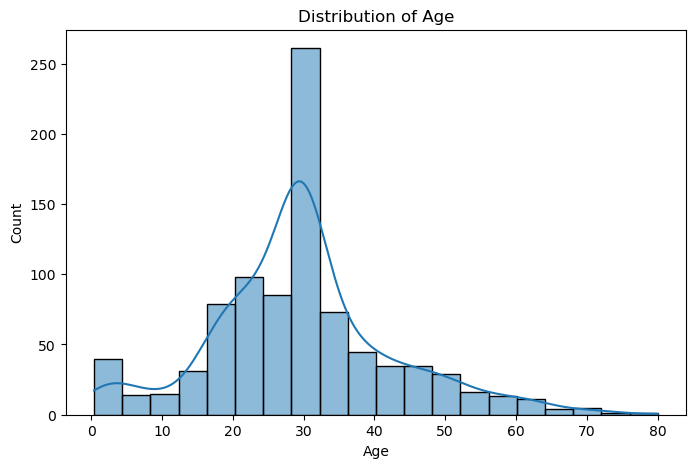

In [83]:
# Bar chart for distribution of age
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

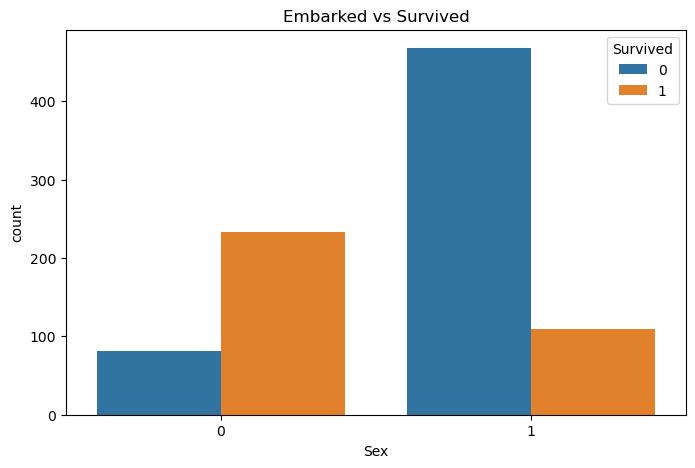

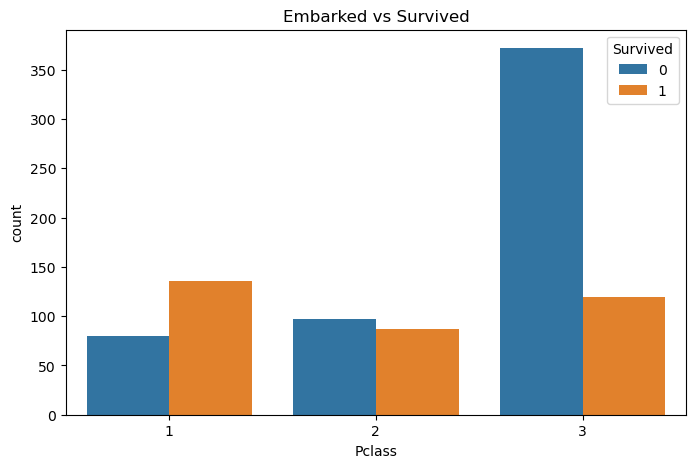

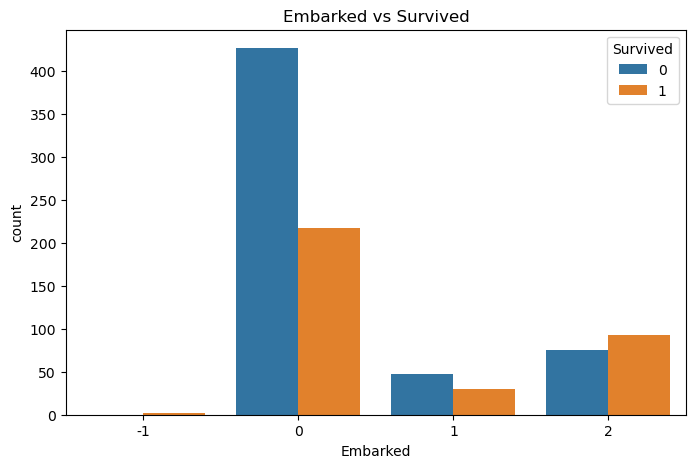

In [84]:
# Visualization of survived vs 3 features
three_features = ['Sex', 'Pclass', 'Embarked']
for feature in three_features:
   plt.figure(figsize=(8, 5))
   sns.countplot(x=feature, data=train_df, hue='Survived')
   plt.title('Embarked vs Survived')
   plt.show()


---

## Step 2: The Model

Build, fit, and evaluate a classification model. Perform any model-specific data processing that you need to perform. If the toolkit you use supports it, create visualizations for loss and accuracy improvements. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [61]:
# Your code goes here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target (y)
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Build the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]


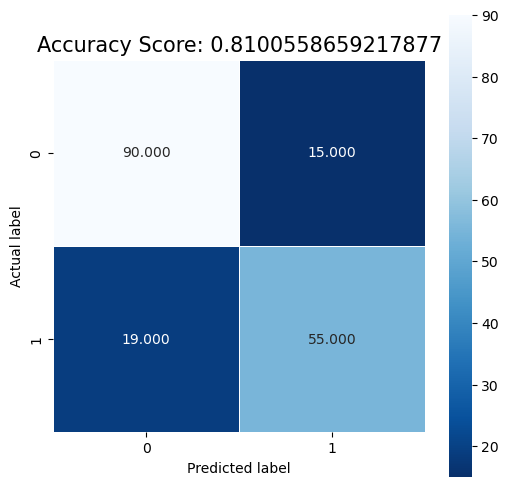

In [64]:
#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)
plt.show()


In [65]:
# Save the model
import joblib
joblib.dump(model, 'model.joblib')
print('Model has been saved as model.joblib')

Model has been saved as model.joblib


---

## Step 3: Make Predictions and Upload To Kaggle

In this step you will make predictions on the features found in the `test.csv` file and upload them to Kaggle using the [Kaggle API](https://github.com/Kaggle/kaggle-api). Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [ ]:
# Your code goes here

What was your Kaggle score?

> *Record your score here*

---

## Step 4: Iterate on Your Model

In this step you're encouraged to play around with your model settings and to even try different models. See if you can get a better score. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

> Optimizing Logistic Regression by using GridSearchCV isnt really getting us better results

In [70]:
# Your code goes here
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

target_column = 'Survived'
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X_train, X_validate, y_train, y_validate = train_test_split(
    train_df[feature_columns],
    train_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    #stratify=train_df[target_column]
)

model = LogisticRegression(
    random_state=2020,
)

search = GridSearchCV(model, {
  # Your Solution Goes Here
  'tol': [1e-1, 1e-2, 1e-3, 1e-4],
  'C': [1e-2, 1e-1, 1, 10, 100],
  'solver': ['sag', 'saga', 'liblinear', 'lbfgs', 'newton-cholesky', 'newton-cg'],
  'max_iter': [5, 50, 500, 5000]
})

search.fit(X_train, y_train)

print(search.best_estimator_)

/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aiml/lib/python3.11/site-packages/s

LogisticRegression(C=0.1, max_iter=500, random_state=2020, tol=0.01)


In [71]:
model = LogisticRegression(C=0.1,
                           max_iter=500,
                           random_state=2020,
                           solver='lbfgs',
                           tol=0.01
                           )
model.fit(X_train, y_train)
new_predictions = model.predict(X_validate)

print('Accuracy: ', round(accuracy_score(new_predictions, y_validate), 3))
print('Precision: ', round(precision_score(new_predictions, y_validate), 3))
print('Recall: ', round(recall_score(new_predictions, y_validate), 3))
print('F1: ', round(f1_score(new_predictions, y_validate), 3))


Accuracy:  0.81
Precision:  0.743
Recall:  0.786
F1:  0.764


---

> Trying K-nearest-neighbors

In [77]:
# Your code goes here

from sklearn.neighbors import KNeighborsClassifier

target_column = 'Survived'
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X_train, X_validate, y_train, y_validate = train_test_split(
    train_df[feature_columns],
    train_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    #stratify=train_df[target_column]
)

model = KNeighborsClassifier()

search = GridSearchCV(model, {
  'n_neighbors': [3, 5, 8, 13, 21],
  'weights': ['uniform', 'distance'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'p': [1, 2, 3]
})

search.fit(X_train, y_train)

print(search.best_estimator_)

KNeighborsClassifier(n_neighbors=13, p=1, weights='distance')


In [78]:
model = KNeighborsClassifier(n_neighbors=13,
                           p=1,
                           algorithm='auto',
                           weights='distance'
                           )
model.fit(X_train, y_train)
new_predictions = model.predict(X_validate)

print('Accuracy: ', round(accuracy_score(new_predictions, y_validate), 3))
print('Precision: ', round(precision_score(new_predictions, y_validate), 3))
print('Recall: ', round(recall_score(new_predictions, y_validate), 3))
print('F1: ', round(f1_score(new_predictions, y_validate), 3))

Accuracy:  0.749
Precision:  0.608
Recall:  0.738
F1:  0.667


> Trying Decision Trees

In [81]:
# Your code goes here

from sklearn.tree import DecisionTreeClassifier

target_column = 'Survived'
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X_train, X_validate, y_train, y_validate = train_test_split(
    train_df[feature_columns],
    train_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    #stratify=train_df[target_column]
)

model = DecisionTreeClassifier()

search = GridSearchCV(model, {
  'criterion': ['gini', 'entropy', 'log_loss'],
  'splitter': ['best', 'random'],
})

search.fit(X_train, y_train)

print(search.best_estimator_)

DecisionTreeClassifier(criterion='log_loss', splitter='random')


In [82]:
model = DecisionTreeClassifier(criterion='log_loss',
                           splitter='random'
                           )
model.fit(X_train, y_train)
new_predictions = model.predict(X_validate)

print('Accuracy: ', round(accuracy_score(new_predictions, y_validate), 3))
print('Precision: ', round(precision_score(new_predictions, y_validate), 3))
print('Recall: ', round(recall_score(new_predictions, y_validate), 3))
print('F1: ', round(f1_score(new_predictions, y_validate), 3))

Accuracy:  0.788
Precision:  0.77
Recall:  0.731
F1:  0.75
